# Analog to digital conversion

During this chapter will learn how to convert an analog signal into a digital signal made of 0's and 1's 



## What is an analog signal?

An analog signal is continous in time and values.

It has an infinite number of values in a time span and these values have an infinite range of levels

Let's take as an example this signal
<!--- https://www.elprocus.com/differences-between-analog-signal-and-digital-signal/ --->

<img src="res/analog_signal.png" width="200"  height="100">

How many values can it have it 1 second?

1000 (ms)? 1000000 (ns)? 1000000000 (us)? -> ∞

How many levels can a values have between -1 and 1?

0.1? 0.0001? 0.0000001? -> ∞

## How is an analog signal converter into a digital one?

In the digital world we work in a discrete space.

Analog to digital conversion is the process of converting a continous signal into a discrete signal.

This happens with these processes:
 * Quantization
 * Sampling


## Setting up 
Let's start creating some helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def configure_plot(ax, quantizing_bits=None, show_axis=True):
    ax.set_xlabel("Time")
    ax.set_ylabel("Amplitude")
    ax.yaxis.grid(show_axis)

## Analog signal

We will use as analog signal a generated signal with a frequency of 4Hz, an amplitude of 1 and a duration of 1s

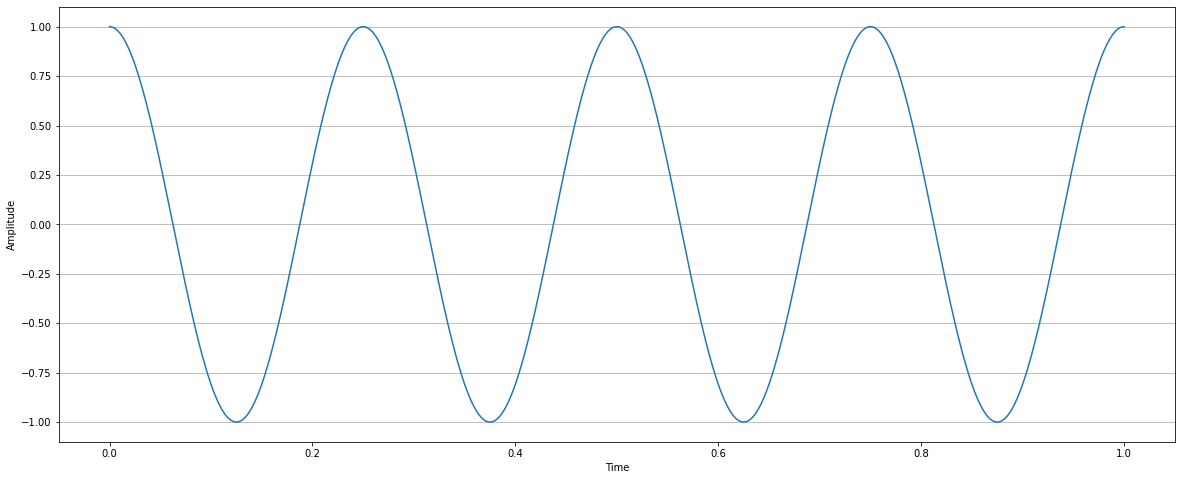

In [2]:
amplitude = 1.

def gen_analog_signal (duration=1., carrier_frequency=4., phase=0):
    # We simulate an analog signal creating a digital signal with 10e5 samples
    analog_time = np.linspace (0, duration, int(10e5))
    analog_signal = amplitude * np.cos (2 * np.pi * carrier_frequency * analog_time + phase)
    return (analog_time, analog_signal)

# Create the analog signal
(analog_time, analog_signal) = gen_analog_signal()
fig, ax = plt.subplots (figsize=(20, 8)); configure_plot(ax, None)

# Plot the signal
ax.plot(analog_time, analog_signal)
plt.show()

## Sampling

Sampling a signal is taking samples of the original signal at a given internal.

We are converting a time-continous signal into time-discrete signal.

We are converting a infinite number of samples into a set of them

For a signal sampled at 10Hz we will take 10 samples by seconds, separated y 100ms


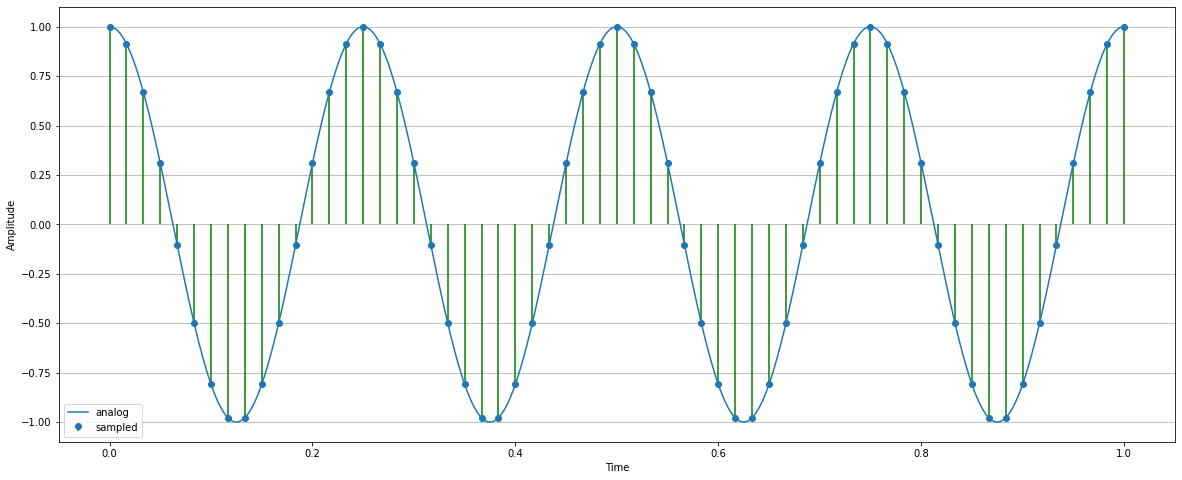

In [3]:
def sample_signal(analog_time, analog_signal, sampling_rate):
    analog_samples = len(analog_signal)
    indexes = np.arange(0, analog_samples, int(analog_samples / sampling_rate))
    # Take sampling_rate samples from the analog signal 
    sampled_time = np.take(analog_time, indexes)
    sampled_signal = np.take(analog_signal, indexes)
    return (sampled_time, sampled_signal)

# Create the figure and plot
fig, ax = plt.subplots (figsize=(20, 8)); configure_plot(ax, None)

# Plot the analog signal
ax.plot(analog_time, analog_signal, label="analog")

# Sample the analog signal at 60Hz
(sampled_time, sampled_signal) = sample_signal(analog_time, analog_signal, 60)

# Plot the sampled signal
ax.stem(sampled_time, sampled_signal, use_line_collection=True, linefmt='g-', basefmt=" ", label="sampled")

ax.legend();
plt.show()

## Quantization

Quantizing a signal is mapping the value levels of the signal to a finite set of levels, the quantization levels.

We are converting a level-continous signal into level-discrete signal.

We are converting a infinite range of levels into a fintie set of them.

A signal with an amplitude of 1 using 2 bits, will have 8 levels

| Value  | Bits   |
|--------|--------|
| +1     | 11     | 
| -0.333 | 10     |
| -0.333 | 01     |
| -1     | 00     |

In [4]:
# Helper class to format values in a binary format
class BinaryFormatter(ticker.Formatter):
    def __init__(self, bits):
        self.bits = bits
    def __call__(self, x, pos=None):
        return format(pos, '0{}b'.format(self.bits))

# Helper to configure the plot
def configure_quant_plot(ax, quantizing_bits):
    configure_plot(ax)
    ax.yaxis.set_ticks(np.arange(-1, 1.01, get_quantizing_step(quantizing_bits)))
    ax.yaxis.set_major_formatter(BinaryFormatter(quantizing_bits))
    
# Returns the step of each level for the quantization bits
def get_quantizing_step(quantizing_bits):
    quantizing_levels = 2 ** quantizing_bits
    return amplitude * 2 / (quantizing_levels - 1)

# Quantize the signal, rounding the values to analog signal to the quantized ones
def quantize_signal(x, quantizing_bits):
    quantizing_levels = 2 ** quantizing_bits
    quantizing_step = get_quantizing_step(quantizing_bits)
    if quantizing_levels % 2 == 0:
        return quantizing_step * (np.around(x / quantizing_step + 0.5) - 0.5)
    else:
        return quantizing_step * np.around(x / quantizing_step)

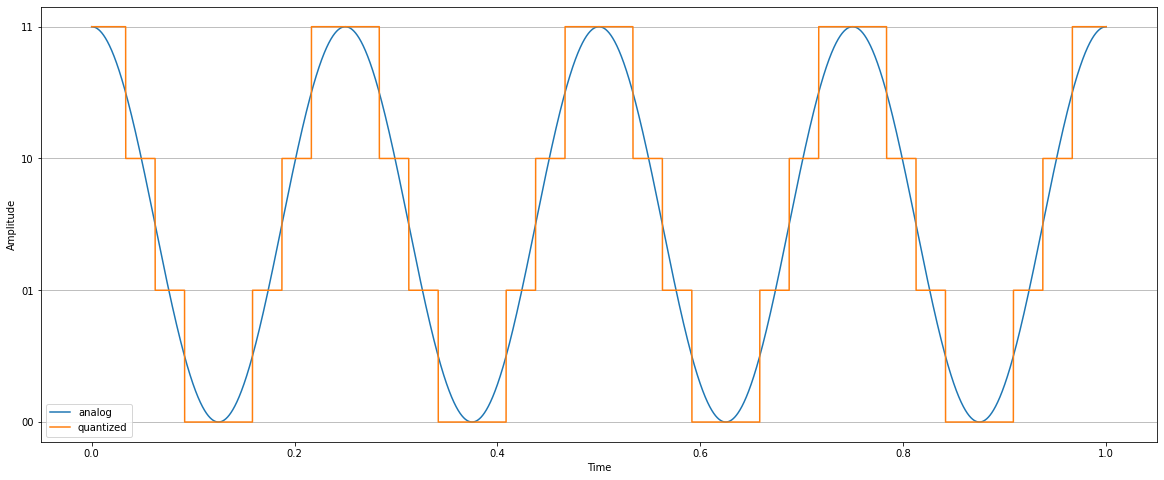

In [5]:
# 2 bits quantization
quant_bits = 2

fig, ax = plt.subplots (figsize=(20, 8)); configure_quant_plot(ax, quant_bits)

# Plot the analog signal
ax.plot(analog_time, analog_signal, label='analog')

# Quantize the signal
quantized_signal = quantize_signal(analog_signal, quant_bits)

# Plot the quantized signal
ax.plot(analog_time, quantized_signal, label='quantized')

ax.legend()
plt.show()

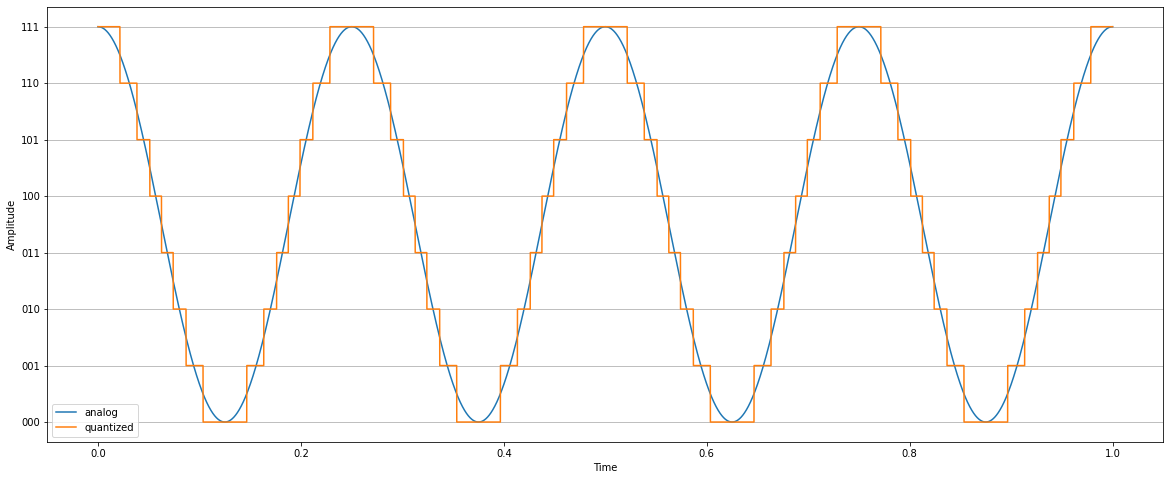

In [6]:
# 3 bits quantization
quant_bits = 3

fig, ax = plt.subplots (figsize=(20, 8)); configure_quant_plot(ax, quant_bits)

# Plot the analog signal
ax.plot(analog_time, analog_signal, label='analog')

# Quantize the signal
quantized_signal = quantize_signal(analog_signal, quant_bits)

# Plot the quantized signal
ax.plot(analog_time, quantized_signal, label='quantized')

ax.legend()
plt.show()

# Quantization error

When we quantize a signal, we are reducing the possibles levels of the signal to a finite set.

Our quantized signal will differ from the original one.

The quantization error is the difference between both signal, the more bits we use to qunatize a signal, the more similiar it will look to the original one, and therefore the lower the error will be.

The maximum error intriduced is 1 quantization level.


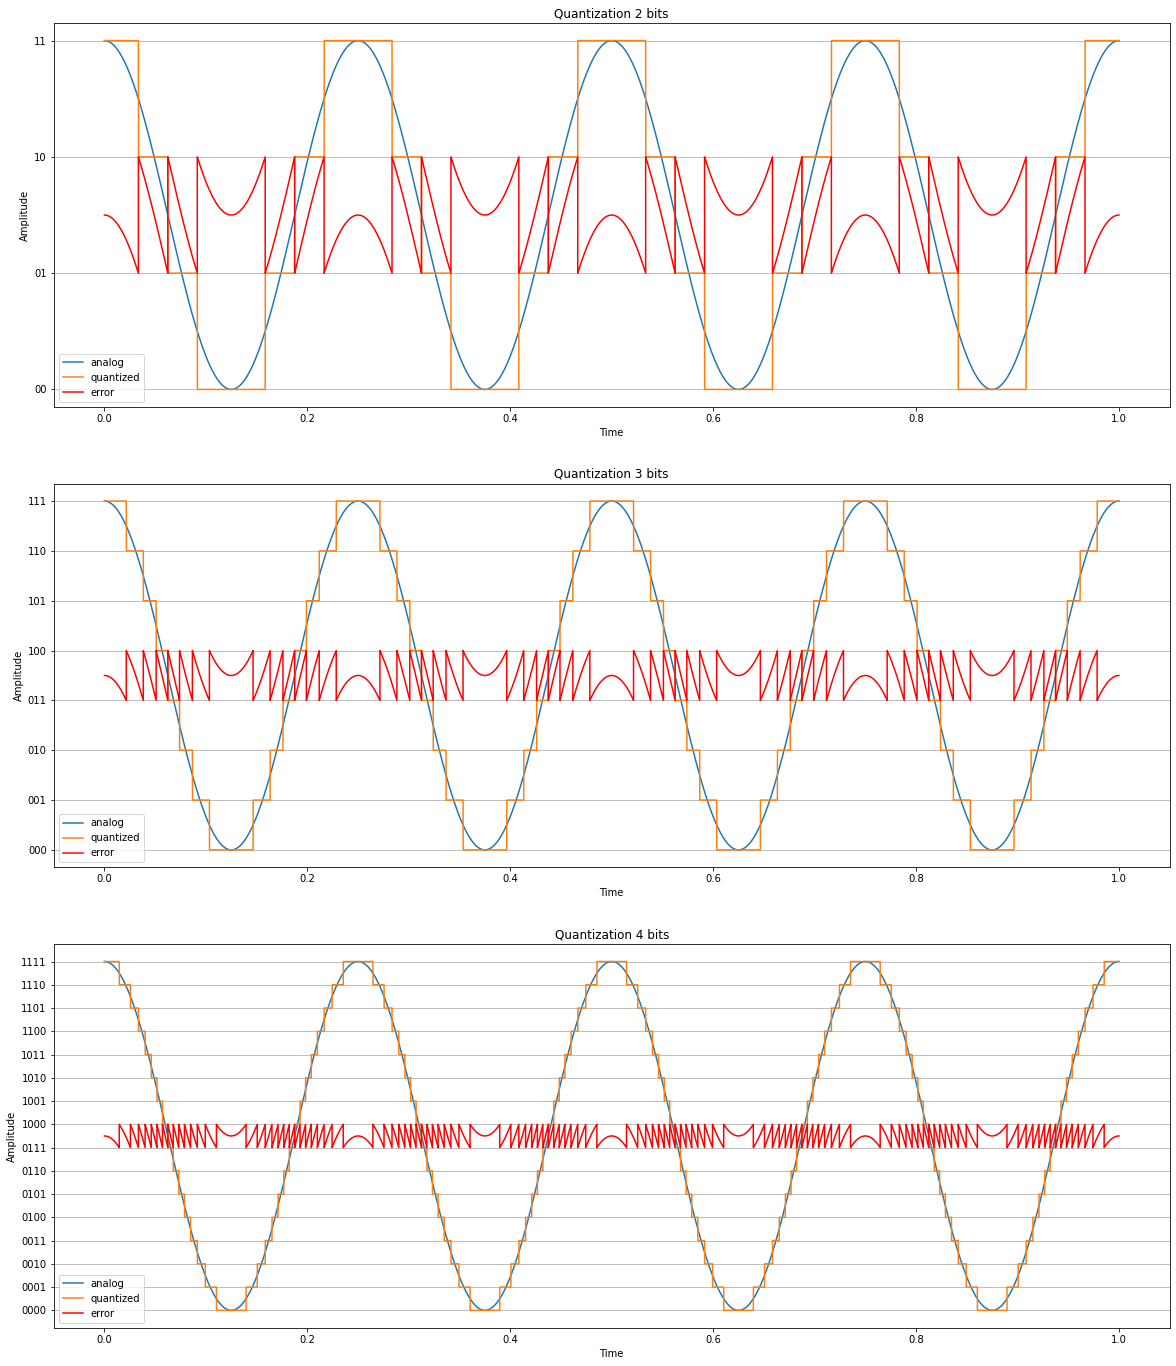

In [7]:
def plot_quant_and_error(ax, quantization_bits):
    quantized_signal = quantize_signal(analog_signal, quantization_bits)
    ax.set_title("Quantization {} bits".format(quantization_bits))
    ax.plot(analog_time, analog_signal, label='analog')
    ax.plot(analog_time, quantized_signal, label='quantized')
    ax.plot(analog_time, analog_signal - quantized_signal, label='error', color="r")
    ax.legend()

fig, (ax1, ax2, ax3) = plt.subplots (3, 1, figsize=(20, 24));
configure_quant_plot(ax1, 2); configure_quant_plot(ax2, 3); configure_quant_plot(ax3, 4);

# 2bits
plot_quant_and_error(ax1, 2)

# 3bits
plot_quant_and_error(ax2, 3)

# 4bits
plot_quant_and_error(ax3, 4)

plt.show()

# Digital Signal

A digital signal is an analog signal that has passed through a sampling and quantization process

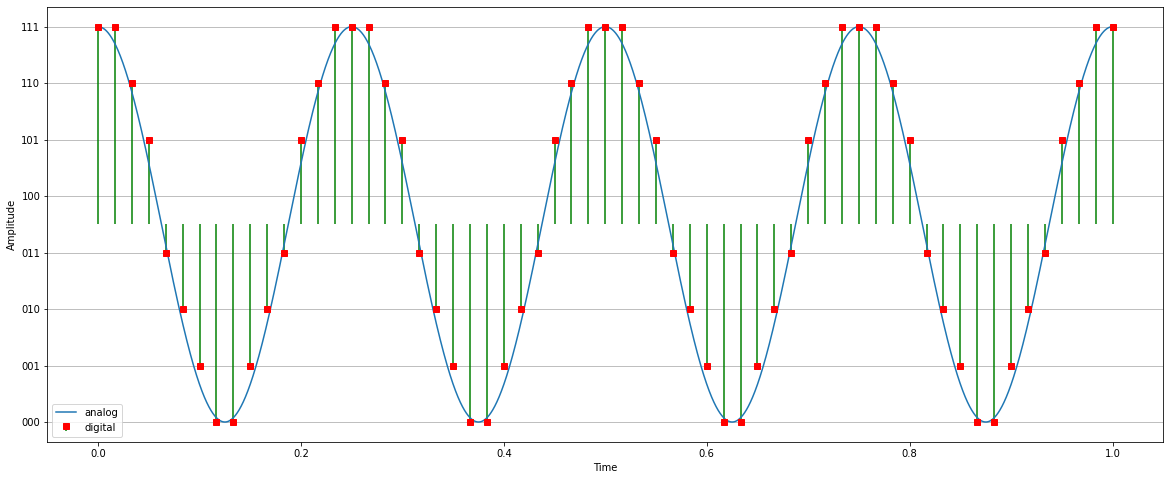

In [9]:
quant_bits = 3

# Apply 3 bits quantization
quantized_signal = quantize_signal(analog_signal, quant_bits)

# Sample at 60Hz
(sampled_time, sampled_and_quantized_signal) = sample_signal(analog_time, quantized_signal, 60)


fig, ax = plt.subplots (figsize=(20, 8)); configure_quant_plot(ax, quant_bits)

# Plot the analog signal
ax.plot(analog_time, analog_signal, label='analog')

# Plot the sampled
ax.stem(sampled_time, sampled_and_quantized_signal, use_line_collection=True, linefmt='g-', basefmt=" ",  markerfmt='rs', label="digital")
ax.legend()
plt.show()

# Let's encode our digital signal

To encode our digital signal, we will read the level of each value


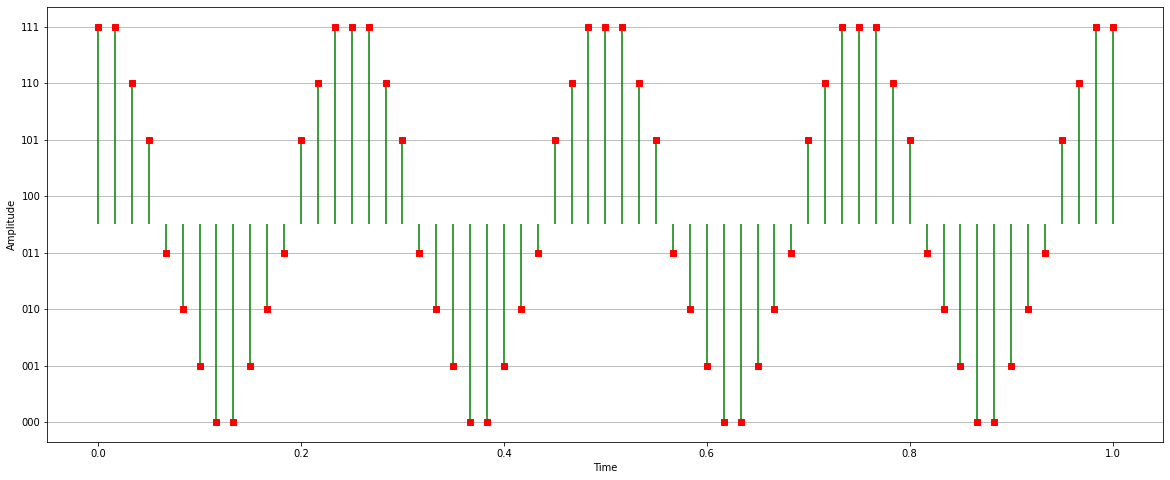

In [11]:
fig, ax = plt.subplots (figsize=(20, 8)); configure_quant_plot(ax, quant_bits)

ax.stem(sampled_time, sampled_and_quantized_signal, use_line_collection=True, linefmt='g-', basefmt=" ",markerfmt='rs', label="sampled")

plt.show()


 * 1st sample: 111
 * 2nd sample: 111
 * 3rd sample: 110
 * 4th sample: 101
 * 5th sample: 011
 
111111110101011....

We have converted an analog signal into a digital one!